# TP correction Atmosphérique (tutoriel traitement geospatial)


***
##### par Julien Meloche

Le but de ce TP est de pouvoir appliquer une correction atmosphérique sur des mesures de température de brillance ($T_B$). 
Ce TP vas vous permettre d'explorer des librairies très puissantes sur python.

1. installation de python et environnement anaconda
2. ouverture de fichier netcdf avec xarray, pandas et numpy
3. traitement géospatiale (rasterio, geopandas)
4. correction atmosphérique


#### 1. Création d'environnement avec conda (anaconda)
Ceci vas vous permettre d'installer des librairies pour différent projet sans créer des conflits. C'est une bonnne habitude d'avoir plusieurs environnement. Nous allons donc créer un environnment pour le traitement géospatiale.


utiliser votre barre de recherche windows pour ouvrir le anaconda prompt

dans le anaconda prompt ... <br><br>
crée un environnement virtuelle nommée "geospatial" (ou le nom que vous voulez) avec la commande

```console
conda create --name geospatial
```
activer votre environnement
```console
conda activate geospatial
```
installer les librairies de base
```console
conda install numpy pandas xarray matplotlib
```
installer la lecture de fichier netcdf
```console
conda install netcdf4
```

installer les librairies de traitement spatial
```console
conda install rasterio geopandas
```


#### 2. Ouverture d'image SSMIS provenant de NSIDC (Nationa Snow and Ice Data Center)

Les données de température de brillance ($T_B$) sont en fichier netcdf (.nc).  Le network Common Data Form (netcdf) est un format de fichier qui permet de stocker des données scientifiques multidimensionnelles (variables), telles que la température, l'humidité, la pression, la vitesse et la direction du vent. Il est très utilisé pour les données météo, imagerie satellite et autre puisqu'il permet de gérer des données spatiales et temporelles en même temps.
<br><br>
La librarie xarray permet d'ouvrir et enregistrer ces fichier. Xarray est très puissant. Cette librairie est en quelque sort la librairie Pandas mais en multidimension!

<img src = "xarray-datastructure.png" width =900>

In [24]:
#on importe la libraire pour pouvoir l'utilisé sous l'acronyme xr
import xarray as xr

In [25]:
#On peut ensuite lire un fichier .nc de cette facon
#ce fichier provient directement de NSIDC
filename = 'NSIDC-0630-EASE2_N3.125km-F18_SSMIS-2019097-37V-M-SIR-CSU-v1.4.nc'
tb = xr.open_dataset(filename)

c:\Users\julie\anaconda3\envs\geospatial\Lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'TB' has multiple fill values {60000, 0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
c:\Users\julie\anaconda3\envs\geospatial\Lib\site-packages\xarray\conventions.py:431: SerializationWarning: variable 'TB_std_dev' has multiple fill values {65534, 65535}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
c:\Users\julie\anaconda3\envs\geospatial\Lib\site-packages\xarray\coding\times.py:254: RuntimeWarning: invalid value encountered in cast
  flat_num_dates_ns_int = (flat_num_dates * _NS_PER_TIME_DELTA[delta]).astype(


Le fichier netcdf est maintenant converti en objet X array 
<br><br>
On peut voir les différentes dimensions, coordonnées et variable. Au lieu d'avoir une image de TB avec un dimension x,y. Ici on a plusieurs "image" (Tb_num_sample, incidence angle, TB_std_dev, ...) avec la même dimension x,y
<br><br>
Dans ce cas particulier, les images de NSIDC contiennent seulement une date (time = 1)

In [26]:
tb

<xarray.Dataset>
Dimensions:          (time: 1, y: 5760, x: 5760)
Coordinates:
  * time             (time) datetime64[ns] 2019-04-07
  * y                (y) float64 8.998e+06 8.995e+06 ... -8.995e+06 -8.998e+06
  * x                (x) float64 -8.998e+06 -8.995e+06 ... 8.995e+06 8.998e+06
Data variables:
    crs              |S1 ...
    TB               (time, y, x) float32 ...
    TB_num_samples   (time, y, x) float32 ...
    Incidence_angle  (time, y, x) float32 ...
    TB_std_dev       (time, y, x) float32 ...
    TB_time          (time, y, x) datetime64[ns] ...
Attributes: (12/79)
    Conventions:                   CF-1.6, ACDD-1.3
    title:                         MEaSUREs Calibrated Passive Microwave Dail...
    product_version:               v1.4
    software_version_id:           1.0.10
    software_repository:           git@bitbucket.org:nsidc/pm-cetb.git
    history:                       meas_meta_sir
    ...                            ...
    input_file13:                  CSU_SSMIS_FCDR_V01R01_F18_D20190407_S1326_...
    input_file14:                  CSU_SSMIS_FCDR_V01R01_F18_D20190407_S1508_...
    input_file15:                  CSU_SSMIS_FCDR_V01R01_F18_D20190407_S1650_...
    input_file16:                  CSU_SSMIS_FCDR_V01R01_F18_D20190407_S1832_...
    input_file17:                  CSU_SSMIS_FCDR_V01R01_F18_D20190407_S2014_...
    input_file18:                  CSU_SSMIS_FCDR_V01R01_F18_D20190407_S2156_...

On peut aussi regarder les données (en spécifiant la variable) en utilisant la fonction plot.
<br><br>
On voit ici les données planétaire du 7 avril 2019!

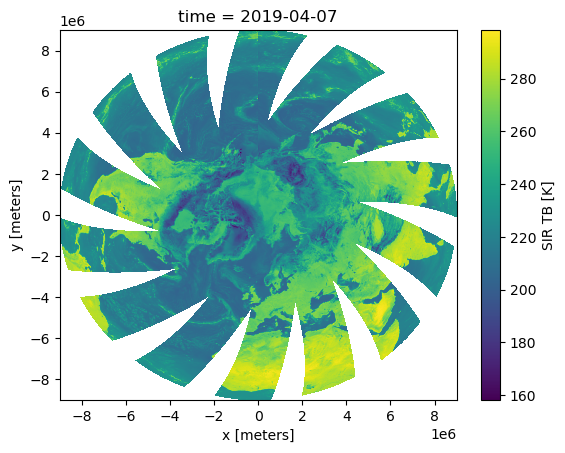

In [92]:
# cette commande peut prendre un certain temps
tb.TB.plot()

Si on ouvre un autre fichier netcdf contenant des temporelles, on voit qu'il très facile de travailler avec les données.
<br><br>


In [93]:
filename_temporal = 'Tb_37H_CamBay_2019-04.nc'
tb_temp = xr.open_dataset(filename_temporal)
tb_temp

<xarray.Dataset>
Dimensions:   (time: 39, y: 59, x: 40)
Coordinates:
  * time      (time) datetime64[ns] 2019-04-08T07:00:00 ... 2019-04-28T17:00:00
  * y         (y) float64 6.828e+05 6.797e+05 6.766e+05 ... 5.047e+05 5.016e+05
  * x         (x) float64 -2.283e+06 -2.28e+06 ... -2.164e+06 -2.161e+06
    lon       (x, y) float64 ...
    lat       (x, y) float64 ...
Data variables:
    TB        (time, y, x) float32 ...
    pwat      (time, y, x) float32 ...
    air_temp  (time, y, x) float32 ...

on peut faire la moyenne des données temporelle et il nous reste seulement la composante spatiale

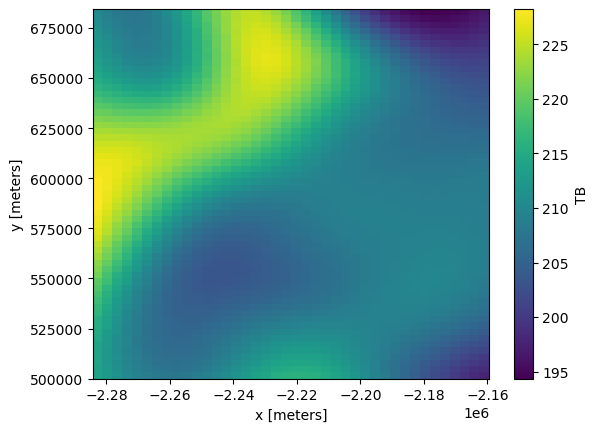

In [89]:
tb_temp.mean(dim = 'time').TB.plot()

Ou on peut faire la moyenne des données spatiales et obtenir la composante temporelle

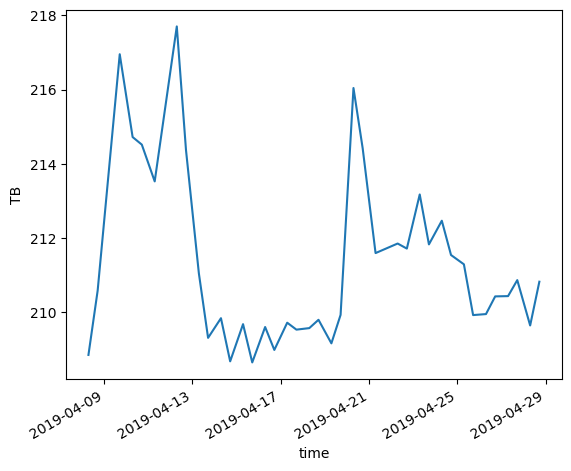

In [87]:
tb_temp.mean(dim = ('x', 'y')).TB.plot()

#### 3. Dans cette section, on peut raffiner les données avec un fichier shapefile comme dans QGIS
On peut utiliser les libraries geopandas (vectoriel) and rasterio (raster) pour faire du traitement comme QGIS ou Arcmap. Ici, on importe un shapefile de l'archipel Arctic Canadien (CAA) pour masker le reste de la planète.

In [70]:
import geopandas
import rasterio.features
import numpy as np

#import shp in geopandas
region_path = "mask_CAA.shp"
shp = geopandas.read_file(region_path)

def mask_tb(shp, tb):
    #careful shp and tb have to be same EPSG
    x = tb.x.values
    y = tb.y.values
    corner = (x[0], y[0])
    resx = np.abs(x[0] - x[1])
    resy = np.abs(y[0] - y[1])

    affine = rasterio.transform.from_origin(corner[0], corner[1], resx, resy)
    area_mask = rasterio.features.geometry_mask(shp.geometry, (len(tb.y), len(tb.x)),transform = affine, invert=True)
    area_mask = xr.DataArray(area_mask , dims=("y", "x"))
    Tb_mask = tb.where(area_mask == True, drop = True)
    
    return Tb_mask

tb_mask = mask_tb(shp, tb)


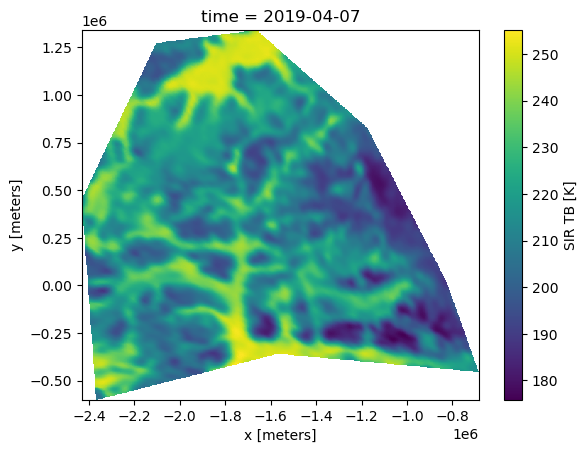

In [71]:
tb_mask.TB.plot()

On peut aussi extraire la valeur d'un pixel qui contient un point d'interet avec la fonction qui est défini (find_point).

In [82]:

def find_point(x, y, ds):
    # First, find the index of the grid point nearest a specific x/y.   
    abs_x = np.abs(ds.x-x)
    abs_y = np.abs(ds.y-y)
    c = np.maximum(abs_x, abs_y)

    ([xloc], [yloc]) = np.where(c == np.min(c))

    # Now I can use that index location to get the values at the x/y diminsion
    point_ds = ds.isel(x=xloc, y=yloc)
    
    return point_ds

#point d'intérêt à Cambridge Bay (IMA)
x_cb = -2229094
y_cb = 592400
extract_tb = find_point(x_cb, y_cb, tb)

#on peut obtient un TB le plus proche de notre point
#on utilise .values pour obtenir la valeur en array simple (numpy)
tb_point = extract_tb.TB.values
tb_point

array([220.15], dtype=float32)

On peut finalement faire des opération mathématique sur cette objet (tb_point dans ce cas ci)

In [84]:
tb_calc = tb_point * 100 + 3.54
tb_calc

array([22018.54], dtype=float32)

même chose avec notre série temporelle

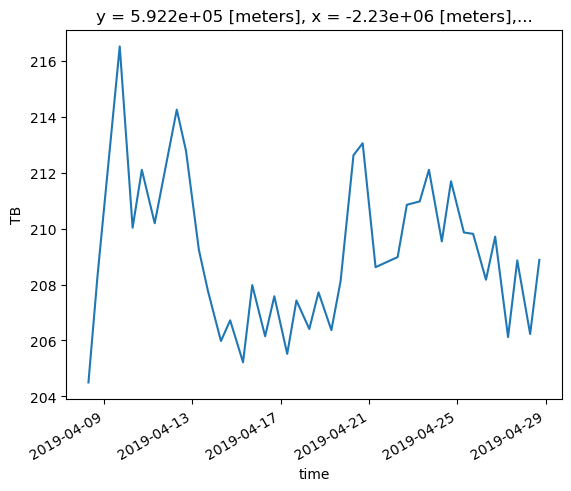

In [91]:
tb_temp_point = find_point(x_cb, y_cb, tb_temp)
tb_temp_point.TB.plot()

In [99]:
tb_temp_point.time.values

array(['2019-04-08T07:00:00.000000000', '2019-04-08T17:00:00.000000000',
       '2019-04-09T17:00:00.000000000', '2019-04-10T07:00:00.000000000',
       '2019-04-10T17:00:00.000000000', '2019-04-11T07:00:00.000000000',
       '2019-04-12T07:00:00.000000000', '2019-04-12T17:00:00.000000000',
       '2019-04-13T07:00:00.000000000', '2019-04-13T17:00:00.000000000',
       '2019-04-14T07:00:00.000000000', '2019-04-14T17:00:00.000000000',
       '2019-04-15T07:00:00.000000000', '2019-04-15T17:00:00.000000000',
       '2019-04-16T07:00:00.000000000', '2019-04-16T17:00:00.000000000',
       '2019-04-17T07:00:00.000000000', '2019-04-17T17:00:00.000000000',
       '2019-04-18T07:00:00.000000000', '2019-04-18T17:00:00.000000000',
       '2019-04-19T07:00:00.000000000', '2019-04-19T17:00:00.000000000',
       '2019-04-20T07:00:00.000000000', '2019-04-20T17:00:00.000000000',
       '2019-04-21T07:00:00.000000000', '2019-04-22T07:00:00.000000000',
       '2019-04-22T17:00:00.000000000', '2019-04-23

##### pour faire un graphique avec Matplotlib

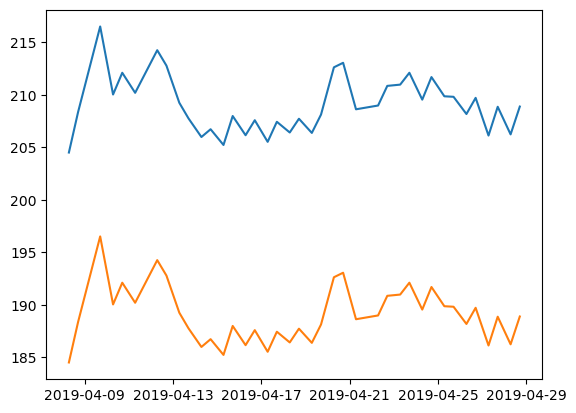

In [106]:
#pour faire un graphique
import matplotlib.pyplot as plt

plt.plot(tb_temp_point.time.values, tb_temp_point.TB.values)

tb_offset = tb_temp_point.TB.values - 20

plt.plot(tb_temp_point.time.values, tb_offset)

#### 4. Correction atmosphérique

Pour le TP, vous devez effectuer une correction atmosphérique sur le point d'intérêt à Cambridge Bay et la série temporelle du fichier 'Tb_37H_CamBay_2019-04.nc'
<br><br>
Ensuite, comparer l'évolution temporelle du $T_B$ corrigé et non corrigé à l'aide de graphique. Vous pouvez utiliser la librairie matplotlib


In [ ]:
#point d'intérêt à Cambridge Bay (IMA)
x_cb = -2229094
y_cb = 592400

filename_temporal = 'Tb_37H_CamBay_2019-04.nc'